In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
Liver_df = pd.read_csv('indian_liver_patient.csv')
Liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [200]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
Liver_df['Gender'] = l.fit_transform(Liver_df['Gender'])
Liver_df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [201]:
Liver_df.Albumin_and_Globulin_Ratio = Liver_df.Albumin_and_Globulin_Ratio.fillna(Liver_df['Albumin_and_Globulin_Ratio'].mean())
Liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [202]:
corr_matrix = Liver_df.corr()
corr_matrix['Dataset']*100

Age                           -13.735063
Gender                         -8.241591
Total_Bilirubin               -22.020756
Direct_Bilirubin              -24.604634
Alkaline_Phosphotase          -18.486561
Alamine_Aminotransferase      -16.341616
Aspartate_Aminotransferase    -15.193375
Total_Protiens                  3.500824
Albumin                        16.138782
Albumin_and_Globulin_Ratio     16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64

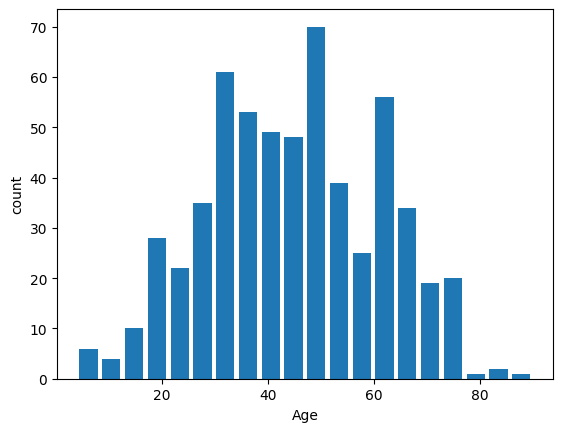

In [226]:
plt.hist(Liver_df.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [216]:
Liver_df['Age'].describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [203]:
# X =  Liver_df.drop(['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Dataset','Total_Protiens'], axis=1)
X =  Liver_df.drop(['Dataset','Total_Protiens','Alamine_Aminotransferase','Total_Protiens'], axis=1)
y = Liver_df['Dataset']
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,18,3.3,0.90
1,62,1,10.9,5.5,699,100,3.2,0.74
2,62,1,7.3,4.1,490,68,3.3,0.89
3,58,1,1.0,0.4,182,20,3.4,1.00
4,72,1,3.9,2.0,195,59,2.4,0.40
...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,34,1.6,0.37
579,40,1,0.6,0.1,98,31,3.2,1.10
580,52,1,0.8,0.2,245,49,3.2,1.00
581,31,1,1.3,0.5,184,32,3.4,1.00


In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
X_train.shape[0]+ X_test.shape[0]

(466, 8) (117, 8)


583

In [205]:
a = {};


In [206]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)*100
a['LogisticRegression'] = lr_score

C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [207]:
# Support Vectior Machine


from sklearn.svm import SVC
s = SVC(C=1,kernel='linear',gamma='auto')
s.fit(X_train,y_train)
s_score = s.score(X_test,y_test)*100 # after tuning 68.37606837606837
a['SVC'] = s_score

In [208]:
# Random FOrest



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)*100
a['RandomForestClassifier'] = rf_score

In [209]:
# from sklearn.decomposition import PCA
# p = PCA(0.95)
# X_pca = p.fit_transform(X)
# X_pca

# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=1)
# lr.fit(X_train_pca,y_train)
# lr.score(X_test_pca, y_test)*100

In [210]:
# Naive Bayes



from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_score = nb.score(X_test,y_test)*100
a['GaussianNB'] = nb_score

In [211]:
# k nearest neighbors



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)*100
a['KNeighborsClassifier'] = knn_score

In [212]:
# Decision Tree



from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
t_score = t.score(X_test,y_test)*100 # after tuning 71
a['tree'] = t_score

In [213]:
a

{'LogisticRegression': 74.35897435897436,
 'SVC': 70.94017094017094,
 'RandomForestClassifier': 69.23076923076923,
 'GaussianNB': 59.82905982905983,
 'KNeighborsClassifier': 72.64957264957265,
 'tree': 65.8119658119658}